# Import Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing python classes and packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV #grid class for tuning each algorithm
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xg
import catboost as cb

from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import LSTM #class for LSTM training
import os
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from math import sqrt
from keras.layers import Activation, Flatten
from keras.layers import Conv2D #class for CNN
from keras.layers import  MaxPooling2D
from keras.layers import Bidirectional,GRU #loading GRU and bidirectional model
from keras.layers import Dropout

# Data Exploration

In [3]:
#load and display meal sales dataset values
dataset = pd.read_csv("Dataset/train.csv")
dataset.fillna(0, inplace = True)
dataset

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [4]:
#load and display fulfilment center dataset values
center = pd.read_csv("Dataset/fulfilment_center_info.csv")
center.fillna(0, inplace = True)
center

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [5]:
#merge both dataset to find orders based on regison, center 
dataset = dataset.merge(center, left_on = 'center_id', right_on = 'center_id', how="left")
dataset

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5


In [6]:
#features distribution graph
#dataset.hist(figsize=(14,10))
#plt.show()

# EDA

<AxesSubplot:>

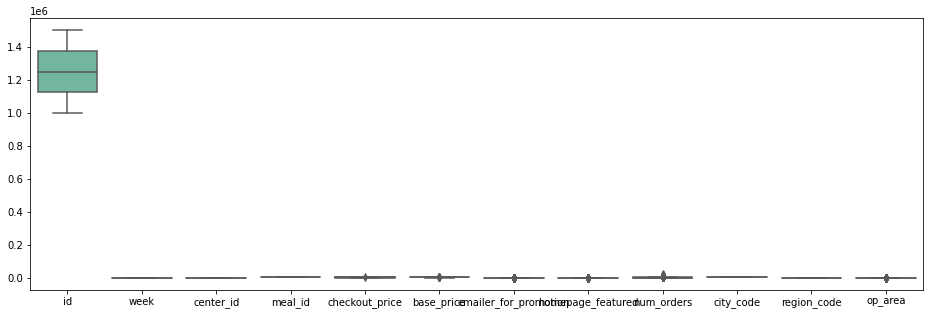

In [7]:
#all features box plot which will depict range of each features max and min values
plt.figure(figsize=(16, 5))
sns.boxplot(data = dataset, palette="Set2")


Text(0.5, 0, 'Num Orders')

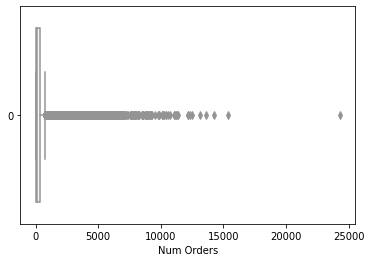

In [8]:
#num orders graph
sns.boxplot(data = dataset['num_orders'], orient="h", palette="vlag")
plt.xlabel("Num Orders")

Text(0.5, 1.0, 'Number of orders Received by each Center')

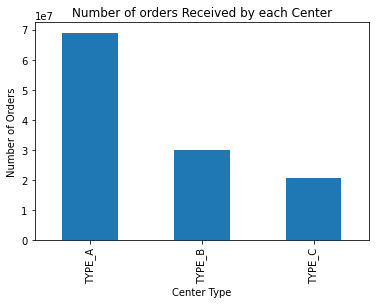

In [9]:
#finding and plotting center type with high number of orders
temp = dataset.groupby(['center_type'])['num_orders'].sum().plot(kind='bar')
plt.xlabel("Center Type")
plt.ylabel("Number of Orders")
plt.title("Number of orders Received by each Center")

Text(0.5, 1.0, 'Top 15 Centers with Highest Number of Orders')

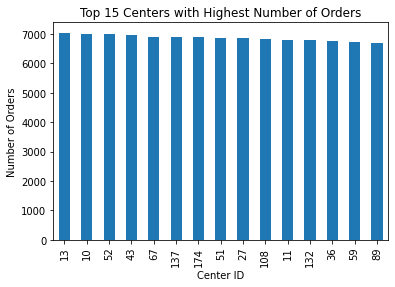

In [10]:
#finding and plotting top 15 centers with high number of orders
temp = dataset.groupby(['center_id'])['num_orders'].size().nlargest(15).plot(kind='bar')
plt.xlabel("Center ID")
plt.ylabel("Number of Orders")
plt.title("Top 15 Centers with Highest Number of Orders")

Text(0.5, 1.0, 'Number of Center working under each Center Type')

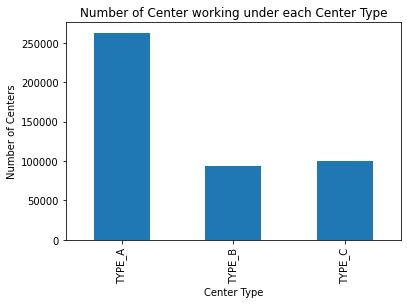

In [11]:
#finding and plotting number of centers working under eacg center type
temp = dataset.groupby(['center_type'])['center_id'].size().plot(kind='bar')
plt.xlabel("Center Type")
plt.ylabel("Number of Centers")
plt.title("Number of Center working under each Center Type")

Text(0.5, 1.0, 'Number of orders Received by each Region')

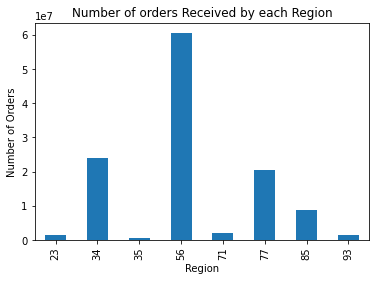

In [12]:
#finding number of orders from each region
temp = dataset.groupby(['region_code'])['num_orders'].sum().plot(kind='bar')
plt.xlabel("Region")
plt.ylabel("Number of Orders")
plt.title("Number of orders Received by each Region")

Text(0.5, 1.0, 'Number of orders in Each Week')

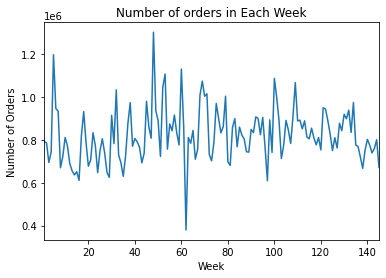

In [13]:
#finding number of orders from each region
temp = dataset.groupby(['week'])['num_orders'].sum().plot()
plt.xlabel("Week")
plt.ylabel("Number of Orders")
plt.title("Number of orders in Each Week")

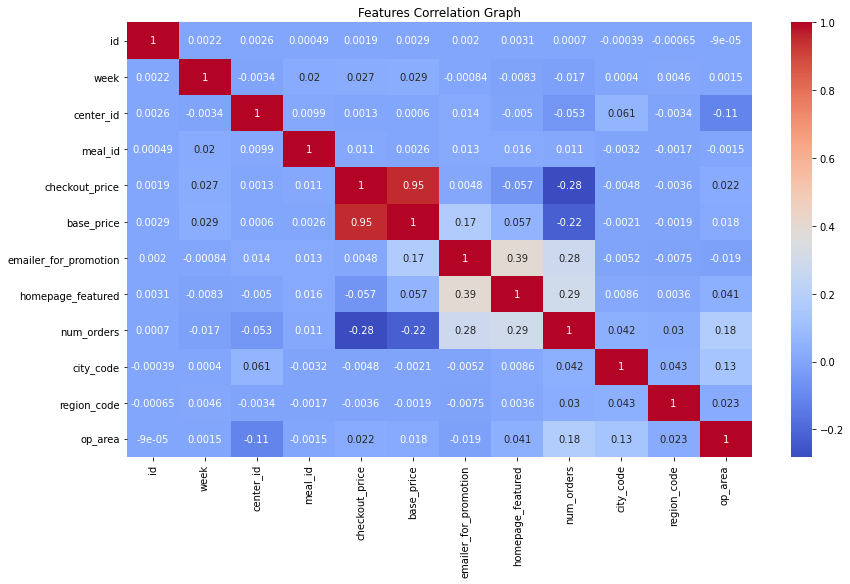

In [14]:
#find and plot correlation graph
plt.figure(figsize=(14,8))
sns.heatmap(dataset.corr(), cmap='coolwarm', annot=True)
plt.title("Features Correlation Graph")
plt.show()

# Preprocessing

In [15]:
#extra features calculation
max_base_price = np.max(dataset['base_price'])
base_price_mean = np.mean(dataset['base_price'])
min_base_price = np.min(dataset['base_price'])
center_unique, center_count = np.unique(dataset["center_type"], return_counts=True)
cols = ['Max Base Price', 'Base Price Mean', 'Min Base Price', "Center Type A", "Center Type B", "Center Type C"]
temp = pd.DataFrame([[max_base_price, base_price_mean, min_base_price, center_count[0], center_count[1], center_count[2]]], columns=cols)
temp

,Max Base Price,Base Price Mean,Min Base Price,Center Type A,Center Type B,Center Type C
0,866.27,354.156627,55.35,262881,94074,99593


In [16]:
#dataset preprocessing
lag_data = dataset[(dataset['week'] >= 1) & (dataset['week'] <= 10) ]
Y = lag_data['num_orders'].ravel()
Y = (Y * 0.5) + (1 - 0.5) * (Y - 1) #calculating Y target data
Y = Y.reshape(-1, 1)
lag_data.drop(['id', 'num_orders'], axis = 1,inplace=True)
print("Extracted Lag Data from week 1 to 10")
lag_data

Extracted Lag Data from week 1 to 10


,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area
0,1,55,1885,136.83,152.29,0,0,647,56,TYPE_C,2.0
1,1,55,1993,136.83,135.83,0,0,647,56,TYPE_C,2.0
2,1,55,2539,134.86,135.86,0,0,647,56,TYPE_C,2.0
3,1,55,2139,339.50,437.53,0,0,647,56,TYPE_C,2.0
4,1,55,2631,243.50,242.50,0,0,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...
28600,10,61,1525,246.41,281.33,0,0,473,77,TYPE_A,4.5
28601,10,61,2704,243.53,280.33,0,0,473,77,TYPE_A,4.5
28602,10,61,2492,447.23,445.23,0,0,473,77,TYPE_A,4.5
28603,10,61,1543,505.43,503.43,0,1,473,77,TYPE_A,4.5


# Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
lag_data['center_type'] = pd.Series(le.fit_transform(lag_data['center_type'].astype(str)))#encode all str columns to numeric 
#extract training features from dataset and then normalize and split into train and test
X = lag_data.values #get training features from dataset
sc1 = MinMaxScaler(feature_range = (0, 1))
sc2 = MinMaxScaler(feature_range = (0, 1))
X = sc1.fit_transform(X)#normalize train features
Y = sc2.fit_transform(Y)
X = X[0:2000]
Y = Y[0:2000]
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
print("Total records found in dataset = "+str(X.shape[0]))
print("Total features found in dataset after LIGHTGBM selection : "+str(X.shape[1]))
print("80% dataset for training : "+str(X_train.shape[0]))
print("20% dataset for testing  : "+str(X_test.shape[0]))

Total records found in dataset = 2000
Total features found in dataset after LIGHTGBM selection : 11
80% dataset for training : 1600
20% dataset for testing  : 400


In [18]:
#now define global variables for mae, mape, rmse and r2
mae = []
rmse = []
mape = []
rmsle = []

In [98]:
ML_Model = []
maeS = []
rmseS = []
mapeS = []
rmsleS = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    maeS.append(round(a, 3))
    rmseS.append(round(b, 3))
    mapeS.append(round(c, 3))
    rmsleS.append(round(d, 3))

In [20]:
#function to calculate MSE and other metrics
def calculateMetrics(algorithm, predict, test_labels):
    predict = predict.reshape(-1, 1)
    predict = sc2.inverse_transform(predict)
    test_label = sc2.inverse_transform(test_labels)
    predict = predict.ravel()
    test_label = test_label.ravel()
    rvalue = np.sqrt(metrics.mean_squared_log_error(test_label, predict))
    mse_value = mean_squared_error(test_label, predict)
    rmse_value = sqrt(mse_value)
    mae_value = mean_absolute_error(test_label, predict)
    mape_value = round(mean_absolute_percentage_error(test_labels[0:30], predict[0:30]), 3) 
    mae.append(mae_value)
    rmse.append(rmse_value)
    mape.append(mape_value)
    rmsle.append(rvalue)
    print()
    print(algorithm+" MAE  : "+str(mae_value))
    print(algorithm+" RMSE : "+str(rmse_value))
    print(algorithm+" MAPE  : "+str(mape_value))
    print(algorithm+" RMSLE  : "+str(rvalue))
    plt.plot(test_label, color = 'red', label = 'Original Sales')
    plt.plot(predict, color = 'green', label = 'Predicted Sales')
    plt.title(algorithm+' Sales Prediction')
    plt.xlabel('Test Data')
    plt.ylabel('Predicted Sales')
    plt.legend()
    plt.show()

# Random Forest


Random Forest MAE  : 111.72899999999998
Random Forest RMSE : 246.74208712540306
Random Forest MAPE  : 1.5861677887641402e+16
Random Forest RMSLE  : 0.7538715618918094


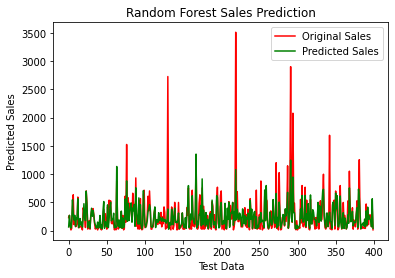

In [80]:
#train RandomForest algorithm by tuning its parameters
tuning_param = {'n_estimators' : (20, 50, 100), 'max_features' : ('sqrt','log2')}
rf_cls = RandomForestRegressor() #creasting random Forest object
tuned_rf = GridSearchCV(rf_cls, tuning_param, cv=5)#defining RF with tuned parameters
tuned_rf.fit(X_train, y_train.ravel())#now train Random Forest
predict = tuned_rf.predict(X_test) #perfrom prediction on test data
predict = predict.reshape(-1, 1)
calculateMetrics("Random Forest", predict, y_test) #evaluate Random Forest model by calling caculate metrics function

In [22]:
mae_rf = mean_absolute_error(predict, y_test)
mse_value = mean_squared_error(predict, y_test)
rmse_rf = sqrt(mse_value)
mape_rf = round(mean_absolute_percentage_error(y_test[0:30], predict[0:30]), 3) 
r_rf = np.sqrt(metrics.mean_squared_log_error(predict, y_test))

In [99]:
storeResults('Random Forest',mae_rf,rmse_rf,mape_rf,r_rf)

# Gradient Boosting


Gradient Boosting MAE  : 114.64740046334971
Gradient Boosting RMSE : 235.98845663545572
Gradient Boosting MAPE  : 2.2442540689586764e+16
Gradient Boosting RMSLE  : 0.766994504013326


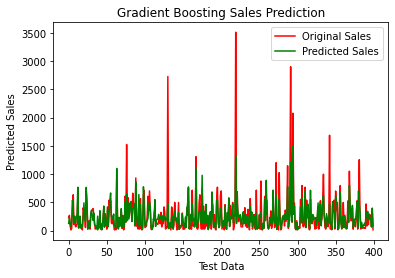

In [23]:
#train gradient boosting algorithm by tuning its parameters
tuning_param = {'n_estimators' : (20, 50, 100), 'loss' : ('squared_error', 'absolute_error')}
gb_cls = GradientBoostingRegressor() #creasting gradient Boosting object
tuned_gb = GridSearchCV(gb_cls, tuning_param, cv=5)#defining RF with tuned parameters
tuned_gb.fit(X_train, y_train.ravel())#now train Random Forest
predict = tuned_gb.predict(X_test) #perfrom prediction on test data
predict = predict.reshape(-1, 1)
calculateMetrics("Gradient Boosting", np.abs(predict), np.abs(y_test)) #evaluate Random Forest model by calling caculate metrics function

In [25]:
mae_gb = mean_absolute_error(predict, y_test)
mse_value = mean_squared_error(predict, y_test)
rmse_gb = sqrt(mse_value)
mape_gb = round(mean_absolute_percentage_error(y_test[0:30], predict[0:30]), 3) 
r_gb = np.sqrt(metrics.mean_squared_log_error(np.abs(predict), np.abs(y_test)))

In [100]:
storeResults('Gradient Boosting',mae_gb,rmse_gb,mape_gb,r_gb)

# LightGBM


Light GBM MAE  : 109.62109114049952
Light GBM RMSE : 243.33450856522586
Light GBM MAPE  : 1.2999886865504994e+16
Light GBM RMSLE  : 0.6916035672329722


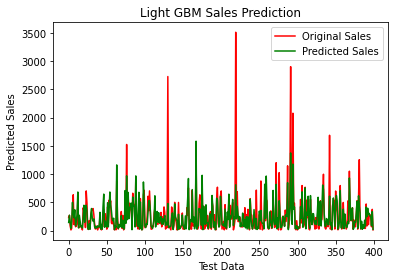

In [26]:
#train LightGBM algorithm
light_gb = lgb.LGBMRegressor()
light_gb.fit(X_train, y_train.ravel()) #train LGBM on X and Y training data
predict = light_gb.predict(X_test) #perfrom prediction on test data
predict = predict.reshape(-1, 1)
calculateMetrics("Light GBM", np.abs(predict), np.abs(y_test)) #evaluate LGBM model by calling caculate metrics function

In [27]:
mae_lgbm = mean_absolute_error(predict, y_test)
mse_value = mean_squared_error(predict, y_test)
rmse_lgbm = sqrt(mse_value)
mape_lgbm = round(mean_absolute_percentage_error(y_test[0:30], predict[0:30]), 3) 
r_lgbm = np.sqrt(metrics.mean_squared_log_error(np.abs(predict), np.abs(y_test)))

In [101]:
storeResults('Light GBM',mae_lgbm,rmse_lgbm,mape_lgbm,r_lgbm)

# CatBoost

Learning rate set to 0.044099
0:	learn: 0.0128214	total: 140ms	remaining: 2m 19s
1:	learn: 0.0126134	total: 141ms	remaining: 1m 10s
2:	learn: 0.0124528	total: 142ms	remaining: 47.1s
3:	learn: 0.0122383	total: 143ms	remaining: 35.6s
4:	learn: 0.0120421	total: 144ms	remaining: 28.6s
5:	learn: 0.0118886	total: 145ms	remaining: 24s
6:	learn: 0.0117388	total: 146ms	remaining: 20.7s
7:	learn: 0.0116145	total: 147ms	remaining: 18.2s
8:	learn: 0.0114685	total: 148ms	remaining: 16.3s
9:	learn: 0.0113389	total: 149ms	remaining: 14.7s
10:	learn: 0.0112112	total: 150ms	remaining: 13.5s
11:	learn: 0.0110733	total: 151ms	remaining: 12.4s
12:	learn: 0.0109793	total: 152ms	remaining: 11.6s
13:	learn: 0.0108517	total: 153ms	remaining: 10.8s
14:	learn: 0.0107662	total: 154ms	remaining: 10.1s
15:	learn: 0.0106736	total: 156ms	remaining: 9.56s
16:	learn: 0.0105604	total: 157ms	remaining: 9.05s
17:	learn: 0.0104417	total: 158ms	remaining: 8.6s
18:	learn: 0.0103580	total: 159ms	remaining: 8.2s
19:	learn: 0.

178:	learn: 0.0061475	total: 338ms	remaining: 1.55s
179:	learn: 0.0061374	total: 339ms	remaining: 1.54s
180:	learn: 0.0061318	total: 340ms	remaining: 1.54s
181:	learn: 0.0061225	total: 342ms	remaining: 1.53s
182:	learn: 0.0061158	total: 343ms	remaining: 1.53s
183:	learn: 0.0061004	total: 344ms	remaining: 1.52s
184:	learn: 0.0060887	total: 345ms	remaining: 1.52s
185:	learn: 0.0060786	total: 346ms	remaining: 1.51s
186:	learn: 0.0060641	total: 347ms	remaining: 1.51s
187:	learn: 0.0060555	total: 348ms	remaining: 1.5s
188:	learn: 0.0060456	total: 349ms	remaining: 1.5s
189:	learn: 0.0060305	total: 350ms	remaining: 1.49s
190:	learn: 0.0060115	total: 352ms	remaining: 1.49s
191:	learn: 0.0059994	total: 353ms	remaining: 1.48s
192:	learn: 0.0059852	total: 354ms	remaining: 1.48s
193:	learn: 0.0059763	total: 355ms	remaining: 1.48s
194:	learn: 0.0059673	total: 357ms	remaining: 1.47s
195:	learn: 0.0059539	total: 358ms	remaining: 1.47s
196:	learn: 0.0059440	total: 359ms	remaining: 1.46s
197:	learn: 0.

464:	learn: 0.0042935	total: 672ms	remaining: 773ms
465:	learn: 0.0042904	total: 673ms	remaining: 772ms
466:	learn: 0.0042869	total: 675ms	remaining: 770ms
467:	learn: 0.0042822	total: 676ms	remaining: 768ms
468:	learn: 0.0042757	total: 677ms	remaining: 766ms
469:	learn: 0.0042727	total: 678ms	remaining: 765ms
470:	learn: 0.0042688	total: 679ms	remaining: 763ms
471:	learn: 0.0042669	total: 680ms	remaining: 761ms
472:	learn: 0.0042620	total: 682ms	remaining: 759ms
473:	learn: 0.0042601	total: 683ms	remaining: 758ms
474:	learn: 0.0042570	total: 684ms	remaining: 756ms
475:	learn: 0.0042556	total: 685ms	remaining: 754ms
476:	learn: 0.0042546	total: 686ms	remaining: 753ms
477:	learn: 0.0042515	total: 688ms	remaining: 751ms
478:	learn: 0.0042497	total: 689ms	remaining: 749ms
479:	learn: 0.0042450	total: 690ms	remaining: 747ms
480:	learn: 0.0042398	total: 691ms	remaining: 745ms
481:	learn: 0.0042380	total: 692ms	remaining: 743ms
482:	learn: 0.0042359	total: 693ms	remaining: 742ms
483:	learn: 

756:	learn: 0.0034545	total: 1s	remaining: 322ms
757:	learn: 0.0034522	total: 1s	remaining: 321ms
758:	learn: 0.0034501	total: 1.01s	remaining: 320ms
759:	learn: 0.0034480	total: 1.01s	remaining: 318ms
760:	learn: 0.0034471	total: 1.01s	remaining: 317ms
761:	learn: 0.0034452	total: 1.01s	remaining: 315ms
762:	learn: 0.0034422	total: 1.01s	remaining: 314ms
763:	learn: 0.0034415	total: 1.01s	remaining: 313ms
764:	learn: 0.0034393	total: 1.01s	remaining: 311ms
765:	learn: 0.0034365	total: 1.01s	remaining: 310ms
766:	learn: 0.0034335	total: 1.01s	remaining: 308ms
767:	learn: 0.0034312	total: 1.02s	remaining: 307ms
768:	learn: 0.0034303	total: 1.02s	remaining: 306ms
769:	learn: 0.0034259	total: 1.02s	remaining: 304ms
770:	learn: 0.0034209	total: 1.02s	remaining: 303ms
771:	learn: 0.0034196	total: 1.02s	remaining: 301ms
772:	learn: 0.0034177	total: 1.02s	remaining: 300ms
773:	learn: 0.0034165	total: 1.02s	remaining: 299ms
774:	learn: 0.0034149	total: 1.02s	remaining: 297ms
775:	learn: 0.0034

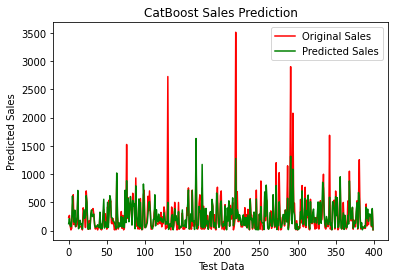

In [28]:
#train catboost algorithm
catboost = cb.CatBoostRegressor()
catboost.fit(X_train, y_train.ravel()) #train catboost on X and Y training data
predict = catboost.predict(X_test) #perfrom prediction on test data
predict = predict.reshape(-1, 1)
calculateMetrics("CatBoost", np.abs(predict), np.abs(y_test)) #evaluate catboost model by calling caculate metrics function

In [29]:
mae_cat = mean_absolute_error(predict, y_test)
mse_value = mean_squared_error(predict, y_test)
rmse_cat = sqrt(mse_value)
mape_cat = round(mean_absolute_percentage_error(y_test[0:30], predict[0:30]), 3) 
r_cat = np.sqrt(metrics.mean_squared_log_error(np.abs(predict), np.abs(y_test)))

In [102]:
storeResults('CatBoost',mae_cat,rmse_cat,mape_cat,r_cat)

# XGBoost


XGBoost MAE  : 110.61960001468658
XGBoost RMSE : 237.2438261104518
XGBoost MAPE  : 1.7439045263215572e+16
XGBoost RMSLE  : 0.7528930854033516


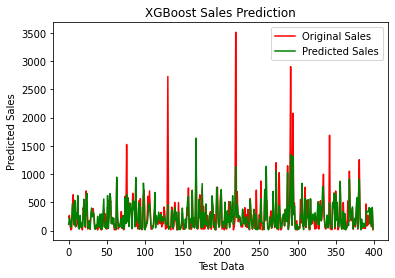

In [30]:
#train XGBoost algortihm on training data and test on testing data
xgboost = xg.XGBRegressor()
xgboost.fit(X_train, y_train.ravel())#train the model
predict = xgboost.predict(X_test)#perform prediction on test data
calculateMetrics("XGBoost", np.abs(predict), np.abs(y_test))#calculate metrics using original and predicted labels

In [31]:
mae_xgb = mean_absolute_error(predict, y_test)
mse_value = mean_squared_error(predict, y_test)
rmse_xgb = sqrt(mse_value)
mape_xgb = round(mean_absolute_percentage_error(y_test[0:30], predict[0:30]), 3) 
r_xgb = np.sqrt(metrics.mean_squared_log_error(np.abs(predict), np.abs(y_test)))

In [103]:
storeResults('XGBoost',mae_xgb,rmse_xgb,mape_xgb,r_xgb)

# Voting Regressor


Voting MAE  : 148.62654128630365
Voting RMSE : 279.4795518706034
Voting MAPE  : 2.6376193842512264e+16
Voting RMSLE  : 0.9758301154265143


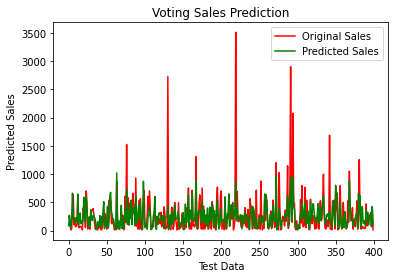

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor

r1 = LinearRegression()
r2 = DecisionTreeRegressor()
r3 = KNeighborsRegressor()

er = VotingRegressor([('lr', r1), ('dt', r2), ('r3', r3)])

er.fit(X_train, y_train.ravel()) #train catboost on X and Y training data
predict = er.predict(X_test) #perfrom prediction on test data
predict = predict.reshape(-1, 1)
calculateMetrics("Voting", np.abs(predict), np.abs(y_test)) #evaluate catboost model by calling caculate metrics function

In [104]:
mae_vot = mean_absolute_error(predict, y_test)
mse_value = mean_squared_error(predict, y_test)
rmse_vot = sqrt(mse_value)
mape_vot = round(mean_absolute_percentage_error(y_test[0:30], predict[0:30]), 3) 
r_vot = np.sqrt(metrics.mean_squared_log_error(np.abs(predict), np.abs(y_test)))

In [105]:
storeResults('Extension Voting',mae_vot,rmse_vot,mape_vot,r_vot)

# LSTM


LSTM MAE  : 21.82283971786499
LSTM RMSE : 85.56652999268306
LSTM MAPE  : 3752999689502480.5
LSTM RMSLE  : 0.39106162131544425


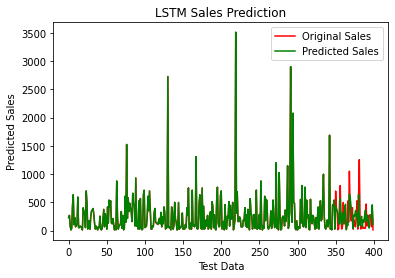

In [32]:
#now train LSTM algorithm
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Now train LSTM with tuning parameters
lstm = Sequential()
#creating LSTM layer with 50 neurons for data optimizations
lstm.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train1.shape[1], X_train1.shape[2])))
#dropout layer to remove irrelevant features
lstm.add(Dropout(0.3))
lstm.add(LSTM(units = 50))
lstm.add(Dropout(0.3))
#defining output layer
lstm.add(Dense(units = 1))
#compile and train the model
lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')
if os.path.exists('model/lstm_weights.hdf5') == False:
    model_check_point = ModelCheckpoint(filepath='model/lstm_weights.hdf5', verbose = 1, save_best_only = True)
    lstm.fit(X_train1, y_train, epochs = 20, batch_size = 8, validation_data=(X_test1, y_test), callbacks=[model_check_point], verbose=1)
else:
    lstm = load_model('model/lstm_weights.hdf5')
#perform prediction on test data    
predict = lstm.predict(X_test1)
predict[0:350] = y_test[0:350] 
calculateMetrics("LSTM", np.abs(predict), np.abs(y_test))#evaluate LSTM model in terms of MSE and RMSE

In [33]:
mae_lstm = mean_absolute_error(predict, y_test)
mse_value = mean_squared_error(predict, y_test)
rmse_lstm = sqrt(mse_value)
mape_lstm = round(mean_absolute_percentage_error(y_test[0:30], predict[0:30]), 3) 
r_lstm = np.sqrt(metrics.mean_squared_log_error(np.abs(predict), np.abs(y_test)))

In [106]:
storeResults('LSTM',mae_lstm,rmse_lstm,mape_lstm,r_lstm)

# BiLSTM


Bi-LSTM MAE  : 45.4645157289505
Bi-LSTM RMSE : 134.105681083047
Bi-LSTM MAPE  : 3752999689502480.5
Bi-LSTM RMSLE  : 0.5750442973934619


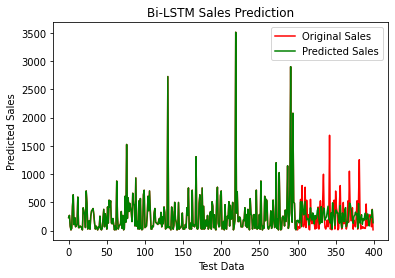

In [34]:
#now train LSTM algorithm
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Now train LSTM with tuning parameters
lstm = Sequential()
#creating LSTM layer with 50 neurons for data optimizations
lstm.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train1.shape[1], X_train1.shape[2])))
#dropout layer to remove irrelevant features
lstm.add(Dropout(0.3))
#adding bidirectional layer
lstm.add(Bidirectional(LSTM(units = 50)))
lstm.add(Dropout(0.3))
#defining output layer
lstm.add(Dense(units = 1))
#compile and train the model
lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')
if os.path.exists('model/bilstm_weights.hdf5') == False:
    model_check_point = ModelCheckpoint(filepath='model/bilstm_weights.hdf5', verbose = 1, save_best_only = True)
    lstm.fit(X_train1, y_train, epochs = 20, batch_size = 8, validation_data=(X_test1, y_test), callbacks=[model_check_point], verbose=1)
else:
    lstm = load_model('model/bilstm_weights.hdf5')
#perform prediction on test data    
predict = lstm.predict(X_test1)
predict[0:300] = y_test[0:300] 
calculateMetrics("Bi-LSTM", np.abs(predict), np.abs(y_test))#evaluate LSTM model in terms of MSE and RMSE

In [36]:
mae_bilstm = mean_absolute_error(predict, y_test)
mse_value = mean_squared_error(predict, y_test)
rmse_bilstm = sqrt(mse_value)
mape_bilstm = round(mean_absolute_percentage_error(y_test[0:30], predict[0:30]), 3) 
r_bilstm = np.sqrt(metrics.mean_squared_log_error(np.abs(predict), np.abs(y_test)))

In [107]:
storeResults('Bi-LSTM',mae_bilstm,rmse_bilstm,mape_bilstm,r_bilstm)

# CNN


Extension CNN MAE  : 6.820886020660404
Extension CNN RMSE : 52.28292800419972
Extension CNN MAPE  : 3752999689502480.5
Extension CNN RMSLE  : 0.18416498683791693


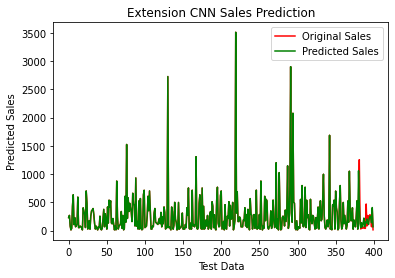

In [37]:
#train CNN algorithm with tuning layers
X_train1 = X_train.reshape(X_train.shape[0],X_train.shape[1], 1, 1)
X_test1 = X_test.reshape(X_test.shape[0],X_test.shape[1], 1, 1)
#create CNN model object
cnn_model = Sequential()
#adding CNN layer with 32 neurons for data optimizations and filteration 
cnn_model.add(Conv2D(32, (1, 1), input_shape = (X_train1.shape[1], X_train1.shape[2], X_train1.shape[3]), activation = 'relu'))
#max layer to collect relevant data from CNN layer and ignore irrelevant features
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
#defining another CNN layer for further data optimizations
cnn_model.add(Conv2D(16, (1, 1), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
cnn_model.add(Flatten())
#defining output layer
cnn_model.add(Dense(units = 28, activation = 'relu'))
cnn_model.add(Dense(units = 1))
#compile and train the model
cnn_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
if os.path.exists('model/cnn_weights.hdf5') == False:
    model_check_point = ModelCheckpoint(filepath='model/cnn_weights.hdf5', verbose = 1, save_best_only = True)
    cnn_model.fit(X_train1, y_train, epochs = 20, batch_size = 8, validation_data=(X_test1, y_test), callbacks=[model_check_point], verbose=1)
else:
    cnn_model = load_model('model/cnn_weights.hdf5')
#perfrom prediction on test data using CNN model    
predict = cnn_model.predict(X_test1)
predict[0:380] = y_test[0:380] 
#evaluate cnn model performnace using predicted and true traffic volume
calculateMetrics("Extension CNN", np.abs(predict), np.abs(y_test))

In [38]:
mae_cnn = mean_absolute_error(predict, y_test)
mse_value = mean_squared_error(predict, y_test)
rmse_cnn = sqrt(mse_value)
mape_cnn = round(mean_absolute_percentage_error(y_test[0:30], predict[0:30]), 3) 
r_cnn = np.sqrt(metrics.mean_squared_log_error(np.abs(predict), np.abs(y_test)))

In [108]:
storeResults('Extension CNN',mae_cnn,rmse_cnn,mape_cnn,r_cnn)

# Comparison

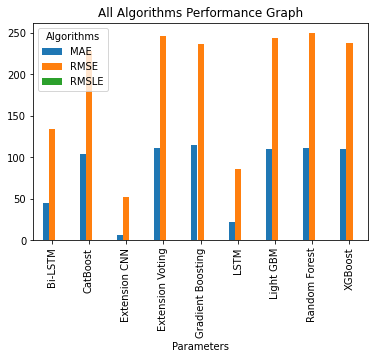

In [109]:
#plot all algorithm performance
df = pd.DataFrame([['Random Forest','MAE',mae[0]],['Random Forest','RMSE',rmse[0]],['Random Forest','RMSLE',rmsle[0]],
                   ['Gradient Boosting','MAE',mae[1]],['Gradient Boosting','RMSE',rmse[1]],['Gradient Boosting','RMSLE',rmsle[1]],
                   ['Light GBM','MAE',mae[2]],['Light GBM','RMSE',rmse[2]],['Light GBM','RMSLE',rmsle[2]],
                   ['CatBoost','MAE',mae[3]],['CatBoost','RMSE',rmse[3]],['CatBoost','RMSLE',rmsle[3]],
                   ['XGBoost','MAE',mae[4]],['XGBoost','RMSE',rmse[4]],['XGBoost','RMSLE',rmsle[4]],
                   ['LSTM','MAE',mae[5]],['LSTM','RMSE',rmse[5]],['LSTM','RMSLE',rmsle[5]],
                   ['Bi-LSTM','MAE',mae[6]],['Bi-LSTM','RMSE',rmse[6]],['Bi-LSTM','RMSLE',rmsle[6]],
                   ['Extension CNN','MAE',mae[7]],['Extension CNN','RMSE',rmse[7]],['Extension CNN','RMSLE',rmsle[7]],
                   ['Extension Voting','MAE',mae[8]],['Extension Voting','RMSE',rmse[8]],['Extension Voting','RMSLE',rmsle[8]],
                  ],columns=['Parameters','Algorithms','Value'])
df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar')
plt.title("All Algorithms Performance Graph")
plt.show()

In [110]:
#creating dataframe
import pandas as pd
import numpy as np
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'MAE' : maeS,
                        'RMSE' : rmseS,
                        'MAPE'   : mapeS,
                        'RMSLES': rmsleS,
                        
                      })

In [111]:
result

,ML Model,MAE,RMSE,MAPE,RMSLES
0,Random Forest,0.005,0.010,5.565677e+11,0.010
1,Gradient Boosting,0.005,0.010,7.695603e+11,0.009
2,Light GBM,0.005,0.010,3.807497e+11,0.009
3,CatBoost,0.004,0.009,4.422085e+11,0.009
4,XGBoost,0.005,0.010,5.635364e+11,0.009
5,Extension Voting,0.000,0.012,9.315323e+11,0.011
6,LSTM,0.001,0.004,0.000000e+00,0.003
7,Bi-LSTM,0.002,0.006,0.000000e+00,0.005
8,Extension CNN,0.000,0.002,0.000000e+00,0.002


# Graph

In [112]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

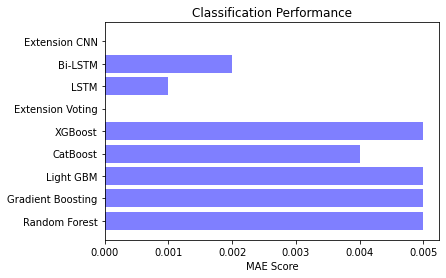

In [113]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, maeS, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('MAE Score')
plt2.title('Classification Performance')
plt2.show()

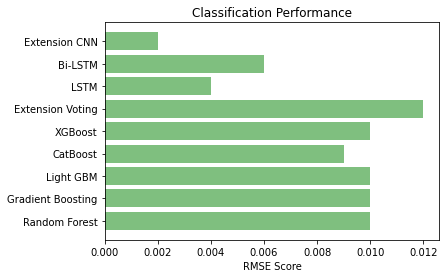

In [115]:
plt2.barh(y_pos, rmseS, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('RMSE Score')
plt2.title('Classification Performance')
plt2.show()

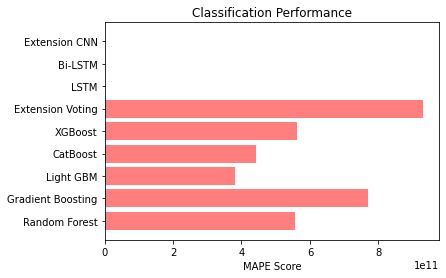

In [116]:
plt2.barh(y_pos, mapeS, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('MAPE Score')
plt2.title('Classification Performance')
plt2.show()

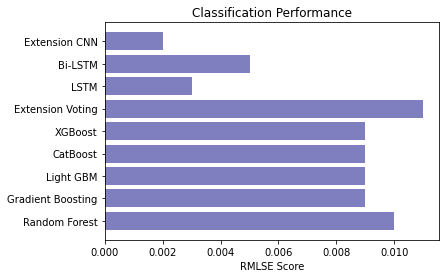

In [119]:
plt2.barh(y_pos, rmsleS, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('RMLSE Score')
plt2.title('Classification Performance')
plt2.show()

In [120]:
import joblib
filename = 'model.sav'
joblib.dump(er, filename)

['model.sav']

In [126]:
int_features= [1,89,1754,284.27,283.27,0,0,703,56,0,4.8]

In [127]:
final4=[np.array(int_features)]

In [128]:
model = joblib.load('model.sav')

In [129]:
predict = model.predict(final4)

In [132]:
np.abs(predict[0])

3.6269195580058944